<a href="https://colab.research.google.com/github/bacdam91/Swinburne-Summer-Scholarship-Project/blob/master/SSSP_Recommender_System_with_GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

### Mounting Google Drive
This code helps to mount Google Drive via an authorization code.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### URL for dataset
This url is for the edgelist of the dataset.

In [0]:
url = "/content/drive/My Drive/Colab Notebooks/GCN for TPL Recommendation/10-10-relation.csv"

### Importing ```pandas```

Importing ```pandas``` library for data manipulation.

In [0]:
import pandas as pd

### Defining constants
Defining some "constants":
1. Headers for dataframe columns

In [0]:
app_header = "AppID"
lib_header = "LibID"
headers = [app_header, lib_header]

### Read ```.csv``` as ```pd.DataFrame```
Read in the edgelist ```.csv``` file as a ```pd.DataFrame``` and ```display``` first 10 edges.

In [7]:
df = pd.read_csv(url, header=None, names=headers)
df[0:10]

,AppID,LibID
0,1,61
1,1,79
2,1,82
3,1,83
4,1,103
5,1,106
6,1,107
7,1,240
8,1,242
9,1,244


### Mini-Samples
Since there is __not__ enough computing power via Google Colab, we will work with a mini-batch of the first 100 apps, $u$, and associated libraries, $v$.

The sets of apps and libraries are represented as $U$ and $V$ respectively, where $M$ and $N$ represent the size of $U$ and $V$, respectively. The formal definition is as followed:
1. $U = \{u_{1}, u_{2} ,... u_{M}\}$
2. $V = \{v_{1}, v_{2} ,... v_{N}\}$
3. $M = |U|$
4. $N = |V|$

In [100]:
mini_sample_size = 1000
df_mini = df.loc[df[app_header] <= mini_sample_size]
print("Number of apps:", len(df_mini[app_header].unique()))
print("Number of libs:", len(df_mini[lib_header].unique()))
print("Edges:", df_mini.shape[0])

Number of apps: 1000
Number of libs: 619
Edges: 18111


From the output above, there are __18,111__ edges between the __1000__ apps and __619__ libraries. 


### Re-ID nodes
Before we can feed it into ```networkx``` to generate a graph $G$, we need to re-ID the entities, $e \in E$, i.e., the apps and the libraries, otherwise ```networkx``` would __not__ be able to differentiate between an app and a library since currently, both types of entities are numerically ID'ed.

The number of entities in graph $G$ equals to $M + N$. The formal definition is therefore:
1. $E = U \cup V = \{e_{1}, e_{2}, ...e_{M+N}\}$
2. $|E| = M + N = O$

We will also need to rename the columns with the previous column headers and display the new ```pd.DataFrame``` for inspection.

In [101]:
df_mini = df_mini.apply(lambda row : ["A" + str(row[app_header]), "L" + str(row[lib_header])], axis=1, result_type="expand")
df_mini = df_mini.rename(columns={0: app_header, 1: lib_header})
display(df_mini[0:10])

,AppID,LibID
0,A1,L61
1,A1,L79
2,A1,L82
3,A1,L83
4,A1,L103
5,A1,L106
6,A1,L107
7,A1,L240
8,A1,L242
9,A1,L244


### Importing ```numpy```
We will require ```numpy``` library for creating an array of edges. An edge represents a relation, $r_{uv} \in R$, between an app, $u_{i}$ and a library, $v_{j}$.

In [0]:
import numpy as np

### Creating node and edge lists

We will now extract the unique IDs of the apps and libraries to create arrays of app nodes and libraries nodes. We will then concatenate the two arrays to form the node list. The edge list can be created by converting the ```df_mini``` into an ```numpy.array```.

Therefore ```nodelist``` =  $E$ and ```edgelist``` = $R$.

In [0]:
app_nodes = pd.Series(df_mini[app_header].unique())
lib_nodes = pd.Series(df_mini[lib_header].unique())

nodelist = pd.concat([app_nodes, lib_nodes])
edgelist = np.array(df_mini)

### Visualising the data
We will set up some visualisation to inspect the dataset via ```networkx```.

### Importing ```networkx```
The library ```networkx``` allows us to quickly visualise graph data as well as manipulate graph attributes with ease. So let's import it.

We will import ```matplotlib.pyplot``` also so we can control the figure size.

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

### Visualisation parameters

Let's define some parameters for our visualisation.

In [0]:
color_apps = "#3b91ed"
color_libs = "#ffac5e"
color_edge = "#9c9c9c"

alpha_node = 0.5
alpha_edge = 0.2

size_node = 50

### Creating a ```networkx.Graph```
Creating a ```networkx.Graph``` is as easy as calling the constructor method and adding in the edges with the method ```.add_edges_from()```.

In [0]:
G = nx.Graph()
G.add_edges_from(edgelist)

### Drawing the graph
Let's draw the graph with some of the parameters we defined above for visualisation purposes.

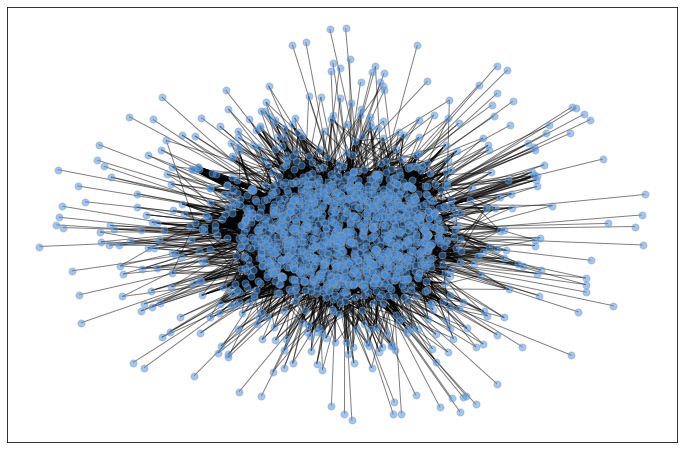

In [107]:
plt.figure(figsize=(12,8))
nx.draw_networkx(G, with_labels=False, node_size=size_node, node_color=color_apps, alpha=alpha_node, edgecolors=color_edge)